# Week 2 - Background
This week we'll walk through these fundamental aspects of any model:
- Materials
- Surfaces
- Cells
- Boundary Conditions
- Sources

This notebook is interactive. You will be required to complete or write code as prompted.

## Starting My OpenMC File

In [111]:
## always type this line to import the openmc module to any project that you do 
import openmc

# Quick Note On Syntax / Getters & Setters

In [112]:
# this:
my_material1 = openmc.Material()
my_material1.name = 'first material!'

# is equivalent to this:
my_material2 = openmc.Material(name='second first material!')

## you can access an object property with object.property
print(my_material2.name)

## either initalizing with properties or setting a property later (with a built in fuction or with object.property = value) both do the same thing
# in this guide, for readability, I'll use the built in functions or object.property = value most of the time, but it's not the only way

second first material!


## Materials

#### Create a material

In [113]:
## make material
fuel = openmc.Material()

## name
fuel.name = "fuel material"

#### Add nuclides

In [114]:
## add nuclide (element, percent, percent type)
fuel.add_nuclide(nuclide='U235', percent=0.025, percent_type='ao')
# this is equivelant:
fuel.add_nuclide('U238', 0.475, 'ao')
# print(fuel)

- nuclide specifies the nuclide
- percent specifies how much of the total material will be that nuclide
- percent type specifies if the percent is atom% or weight%

#### Add elements

In [115]:
# add element (element, percent, percent type)
fuel.add_element(element='O', percent=0.5, percent_type='ao')

same as add_nuclide, except it adds an entire element with natural isotopic abundance

#### Set density

In [116]:
# set density (atom / barn-cm) vs (g/cc)
fuel.set_density(units="g/cm3", density=8.00)

- units can be any in this list: {'g/cm3', 'g/cc', 'kg/m3', 'atom/b-cm', 'atom/cm3', 'sum', 'macro'}
- density is the value for the density of the entire material

#### Set temperature

In [117]:
## set temperature
fuel.temperature = 900 # K

Note: there is no built in function to set the temperature ( ie. set_temperature() ), you just set it with oject.property = value

#### View the Material

In [118]:
## view the material
print(fuel)

Material
	ID             =	31
	Name           =	fuel material
	Temperature    =	900
	Density        =	8.0 [g/cm3]
	Volume         =	None [cm^3]
	Depletable     =	True
	S(a,b) Tables  
	Nuclides       
	U235           =	0.025        [ao]
	U238           =	0.475        [ao]
	O16            =	0.4998105    [ao]
	O17            =	0.0001895    [ao]



notes:
- the id is automatically set for OpenMC to keep track of things
- even though you put O in as an element, OpenMC automatically breakes it down into isotopes using the natural abundnaces

### **User Challange - Materials**:
Create a neutron_poison material with the following specifications:
- named "neutron poison"
- set to 600 K
- density is 2.485400096 g / cm^3
- Composed of $B_4 C$

In [119]:
## your code here:



## Surfaces
We'll only be using planes, cylinders, and spheres for now (this is plenty to design a lot of reactors)


#### Spheres

In [120]:
## Sphere initalization
my_first_sphere = openmc.Sphere() # https://docs.openmc.org/en/stable/pythonapi/generated/openmc.Sphere.html#openmc.Sphere

## Sphere paramaters
# we can set an origin and a radius.
# default origin is (x=0,y=0,z=0)
my_first_sphere.r = 5
# r has units of cm

# print(my_first_sphere)

#### Cylinders

In [121]:
## With Cylinders, we have 3 options: an X, Y, or Z cylinder
# each is an infinite cylinder with the axial direction being the one indicated (X, Y, or Z)

## Cylinder initlization
my_first_z_cylinder = openmc.ZCylinder() # https://docs.openmc.org/en/stable/pythonapi/generated/openmc.ZCylinder.html#openmc.ZCylinder

## Cylinder paramaters
# we can set an origin for the center of the Cylinder in the x-y plane
# default origin is (x=0,y=0)
# we can not an origin in 3d space because this is an infinite cylinder in the z direction
# we can also set the radius of the Cylinder
my_first_z_cylinder.r = 2
# r has units of cm

# print(my_first_z_cylinder)

#### Planes

In [122]:
## with planes, there are 4 options: X, Y, Z, and general
# the general is more complicate, so we will stick with just X, Y, and Z
# Each plane is an infinite flat plane normal to the specified axis

## Plane initlization
my_first_x_plane = openmc.XPlane() # https://docs.openmc.org/en/stable/pythonapi/generated/openmc.XPlane.html#openmc.XPlane
my_second_x_plane = openmc.XPlane() # https://docs.openmc.org/en/stable/pythonapi/generated/openmc.XPlane.html#openmc.XPlane
my_first_y_plane = openmc.YPlane()
my_second_y_plane = openmc.YPlane()

## Plane paramaters
# we can only set the offset from the origin on these
my_first_x_plane.x0 = 3
my_second_x_plane.x0 = -3

my_first_y_plane.x0 = 3
my_second_y_plane.x0 = -3

# print(my_second_y_plane)

#### Half Spaces
Each equation is written and can be viewed at [The OpenMC Documentation Website](https://docs.openmc.org/en/stable/usersguide/geometry.html)

The "surface" is the locations where the equation evalueates to 0.

Everywhere else, the equation will evaluate to either a + or a - value.

These spaces are called half-spaces, and they are how we specify what our geometry is.

For example, all points **inside** a sphere evaluate to a negative number when applied to the equation, so the negative half space of a sphere is the area inside the sphere.

This is critical to understand when creating models, so please take time to wrap your head around it.

Note:
- For cylinders and spheres: - is inside and + is outside
- For Planes: + is in the + direction and - is in the - direction of the plane

In [123]:
## given a sphere:
my_sphere = openmc.Sphere()
my_sphere.r = 10 # cm

## the half space is denoted by putting a + or a - in front of your surface
inside_sphere = -my_sphere
outside_sphere = +my_sphere

#### Combining Half Spaces
Half Spaces can be combined using Boolean operators.

The operators allowed are the following:
- & (intersection, can be considered as the AND operator)
- | (union, can be considered as the OR operator)
- ~ (compliment, can be considered as the NOT operator)

I almost always use the & operator. Pretty much any shape can be made with that operator, and it is the most intuitive. Also, often under the hood, the code reduces the operators down to & operators anyway.

A note: We don't often write out the combination of half spaces until the creation of a cell, this is just for conceptual understandind

In [124]:
## If I want to create cylinder that is 1cm in radius, and 10 cm tall I could do the following:
my_Zcylinder = openmc.ZCylinder()
my_Zcylinder.r = 1 # cm (note, the origin in the xy plane is by default (x=0, y=0) )

my_topZplane = openmc.ZPlane()
my_topZplane.z0 = -5 # cm
my_bottomZplane = openmc.ZPlane()
my_bottomZplane.z0 = 5 # cm

my_rod = -my_Zcylinder & +my_bottomZplane & -my_topZplane

#### Boundary Conditions

Every surface has a boundary condition. Anytime a particle reaches the boundary of a surface, it checks the boundary condition before proceeding. A couple things can happen:
- if the boundary is "transmission" (which every surface is by default, and most surfaces will be), the particle continues in the same direction with the same energy
- if the boundary is "vacuum", the particle is terminated
- if the boundary is "reflective", the particle will be bounced back with the oppostite direction and the same energy as before
- the boundary can also be "periodic" or a number of other options, but we won't talk about those for now

In [125]:
## For the most outer surface, if you want to set the bounary to be a vacuum:
outer_sphere = openmc.Sphere()
outer_sphere.r = 20 # cm
outer_sphere.boundary_type='vacuum'

### **User Challange - Surfaces**:
Create a box with a sphere inside of it with the following specifications:
- box sides are 10 cm in length
- the sphere is 2 cm in radius
- create box_space that is the region inside the box, but not inside the sphere
- create sphere_sphace that is only the region inside the sphere
- set the boundary conditions of the edges of the box to be vacuum

Hints:
- you will need to create a total of 7 surfaces
- box_space will require the & operator intersection of all 7 surfaces
- sphere_space will much easier

In [126]:
## Your code here



## Cells
A cell is a region that is defined in space (using half-space intersections) with an associated material to fill it.

In [127]:
## If I want to create a cell that is a sphere of the material 'fuel':
fuel_cell = openmc.Cell()
fuel_cell.fill = fuel
fuel_cell.region = -my_sphere

In [128]:
## If I instead wanted to creat a cell that is only the top half of that previous cell:
z0_plane = openmc.ZPlane(z0 = 0)

top_half_of_fuel_cell = openmc.Cell()
top_half_of_fuel_cell.fill = fuel
top_half_of_fuel_cell.region = -my_sphere & +z0_plane

#### Note:
- fill requires a material
- region requires a half space or the intersection of a number of half spaces

#### Universes
We will not talk much about universes today except for that when running a simulation, all your cells must be in a base universe.

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

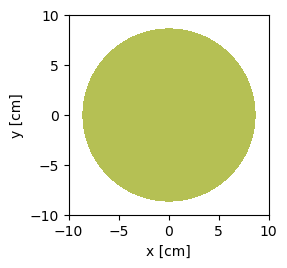

In [130]:
## visualize this cell in the xy plane
main_universe.plot(width=(20.0, 20.0), basis='xy')

<Axes: xlabel='x [cm]', ylabel='z [cm]'>

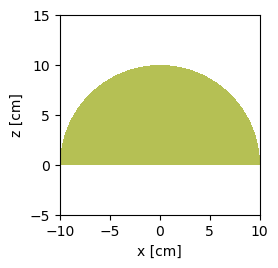

In [131]:
## visualize this cell in the xz plane
main_universe.plot(width=(20.0, 20.0), basis='xz')

### **User Challange - Cells**:
Using your box_space and sphere_sphace half spaces, as well as your neutron_poison material do the following:
- create a cell that is the inside sphere. fill it with the fuel material
- create a cell that is outside the sphere and inside the box. fill it with neutron_poison
- plot the box in the xy plane with a width of 11 cm and height of 11 cm in the view on the plot

## Sources
A source is where the neutrons start out before running the simulation. We will keep our discussion of sources to a minimum. As long as the shannon entropy converges, we are happy. Today we will only discuss points sources. Be aware that your source could be a grid/box, or other configurations if needed (seldom will that be the case for us right now though).

For our purposes, typically just make a point source in the center of your fissionable material.

In [132]:
## If I want to make a point source at the location (x=0, y=0, z=1)

## first create the point as an openmc object using the openmc.stats module
source_point = openmc.stats.Point((0, 0, 1))

## Then create the source object using openmc.IndependentSource. Input the source point you just created
my_source = openmc.IndependentSource(space = source_point)